<center><h1 style="font-size:300%; font-family:cursive; color:navy;">Why do we need BERT ?</h1></center>

<ul>
    <li style="font-size:150%; font-family:verdana;">Proper language representation is key for general-purpose language understanding by machines. Context-free models such as <b>word2vec or GloVe</b> generate a single word embedding representation for each word in the vocabulary. For example, the word “bank” would have the same representation in “bank deposit” and in “riverbank”. Contextual models instead generate a representation of each word that is based on the other words in the sentence. <b>BERT</b>, as a contextual model, captures these relationships in a bidirectional way.</li>
    <br>
    <li style="font-size:150%; font-family:verdana;">BERT was built upon recent work and clever ideas in pre-training contextual representations including Semi-supervised Sequence Learning, Generative Pre-Training, ELMo, the OpenAI Transformer, ULMFit and the Transformer. Although these models are all unidirectional or shallowly bidirectional, BERT is fully bidirectional.</li>
    <br>
    <li style="font-size:150%; font-family:verdana;">The best part about <b>BERT</b> is that it can be download and used for free —  we can either use the  BERT models to extract high quality language features from our text data, or we can fine-tune these models on a specific task, like sentiment analysis and question answering, with our own data to produce state-of-the-art predictions</li>
</ul>

<center><h1 style="font-size:300%; font-family:cursive; color:navy;">What is the core idea behind it?</h1></center>

<p style="font-size:150%; font-family:verdana;">What is language modeling really about? Which problem are language models trying to solve? Basically, their task is to “fill in the blank” based on context. For example, given</p>
<br>
<center><h1 style="font-size:150%; font-family:cursive;">“The woman went to the store and bought a _____ of shoes.”</h1></center>
<br>
<br>
<p style="font-size:150%; font-family:verdana;">a language model(One-Directional Approach) might complete this sentence by saying that the word “cart” would fill the blank 20% of the time and the word “pair” 80% of the time.</p>

<p style="font-size:150%; font-family:verdana;"><b>Now enters BERT</b>, a language model which is bidirectionally trained (this is also its key technical innovation). This means we can now have a deeper sense of language context and flow compared to the single-direction language models. Unlike the previous language models, it takes both the previous and next tokens into account at the same time.</p>

<p style="font-size:150%; font-family:verdana;">Moreover, BERT is based on the Transformer model architecture, instead of LSTMs.</p>

<center><h1 style="font-size:300%; font-family:cursive; color:black; background:skyblue; padding:15px; border:solid;">BERT's ARCHITECTURE</h1></center>

<p style="font-size:150%; font-family:verdana;">There are four types of pre-trained versions of BERT depending on the scale of the model architecture:</p>
<ol>
    <li style="font-size:150%; font-family:verdana;">BERT-Base (Cased / Un-Cased): 12-layer, 768-hidden-nodes, 12-attention-heads, 110M parameters</li>
    <li style="font-size:150%; font-family:verdana;">BERT-Large (Cased / Un-Cased): 24-layer, 1024-hidden-nodes, 16-attention-heads, 340M parameters</li>
</ol>

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/bert_encoder.png"></center>

<p style="font-size:150%; font-family:verdana;">We need to choose <b>which BERT pre-trained weights we want</b>. For example, if we don’t have access to a Google TPU, we’d rather stick with the Base models. And then the choice of “cased” vs “uncased” depends on whether we think letter casing will be helpful for the task at hand.</p>

<center><h1 style="font-size:300%; font-family:cursive; color:navy;">How does it work? - Let's Dive into it</h1></center>

<center><h1 style="font-size:200%; font-family:cursive;">1. <u>Text - Preprocessing</u></h1></center>
<br>
<p style="font-size:150%; font-family:verdana;">BERT relies on a Transformer (the attention mechanism that learns contextual relationships between words in a text). A basic Transformer consists of an encoder to read the text input and a decoder to produce a prediction for the task. Since BERT’s goal is to generate a language representation model, it only needs the encoder part. The input to the encoder for BERT is a sequence of tokens, which are first converted into vectors and then processed in the neural network. For starters, every input embedding is a combination of 3 embeddings:</p>

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/bert_emnedding.png"></center>
<center><h1 style="font-size:150%; font-family:verdana;">The input representation for BERT: The input embeddings are the sum of the token embeddings, the segmentation embeddings and the position embeddings.</h1></center>
<br>
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<ul>
    <li style="font-size:150%; font-family:verdana;"><b>Token embeddings:</b> A [CLS] token is added to the input word tokens at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.</li>
    <li style="font-size:150%; font-family:verdana;"><b>Segment embeddings:</b>A marker indicating Sentence A or Sentence B is added to each token. This allows the encoder to distinguish between sentences.</li>
    <li style="font-size:150%; font-family:verdana;"><b>Positional embeddings:</b>A positional embedding is added to each token to indicate its position in the sentence.</li>
</ul>
<br>
<center><h1 style="font-size:200%; font-family:cursive;">2. <u>Pre-training Tasks</u></h1></center>
<br>
<p style="font-size:190%; font-family:verdana;">BERT is pre-trained on two NLP tasks:</p>

<h1 style="font-size:170%; font-family:cursive; color:navy;"> 1. Masked Language Modelling</h1>
<ul>
    <li style="font-size:150%; font-family:verdana;">Language Modeling is the task of predicting the next word given a sequence of words. In masked language modeling instead of predicting every next token, a percentage of input tokens is masked at random and only those masked tokens are predicted.</li>
    <li style="font-size:150%; font-family:verdana;"> [MASK] Token - This is a token to denote that the token is missing</li>
    <li style="font-size:150%; font-family:verdana;"> The masked words are not always replaced with the masked token – [MASK] because then the masked tokens would never be seen before fine-tuning. Therefore, 15% of the tokens are chosen at random. And out of the 15% of the tokens selected for masking:</li>
    <br>
    <center><h1 style="font-size:150%; font-family:cursive;">80% of the tokens are actually replaced with the token [MASK].</h1></center>
    <center><h1 style="font-size:150%; font-family:cursive;">10% of the time tokens are replaced with a random token.</h1></center>
    <center><h1 style="font-size:150%; font-family:cursive;">10% of the time tokens are left unchanged.</h1></center>
</ul>
<br>
<h1 style="font-size:170%; font-family:cursive; color:navy;"> 2. Next Sentence Prediction</h1>
<ul>
    <li style="font-size:150%; font-family:verdana;">Next sentence prediction task is a binary classification task in which, given a pair of sentences, it is predicted if the second sentence is the actual next sentence of the first sentence.</li>
    <br>
    <center><img src="https://yashuseth.files.wordpress.com/2019/06/fig5.png?w=442&h=231"></center>
    <br>
    <li style="font-size:150%; font-family:verdana;">This task can be easily generated from any monolingual corpus. It is helpful because many downstream tasks such as Question and Answering and Natural Language Inference require an understanding of the relationship between two sentences.</li>
</ul>

<center><h1 style="font-size:200%; font-family:cursive; color:navy; height:65px;">The model is trained with both Masked LM and Next Sentence Prediction together. This is to minimize the combined loss function of the two strategies — “together is better”.</h1></center>


<br>
<center><h1 style="font-size:300%; font-family:cursive; color:black; background:skyblue; padding:15px; border:solid;">IMPLEMENTATION OF BERT</h1></center>

<p style="font-size:150%; font-family:verdana;"><b>Problem Statement:</b> We have a collection of SMS messages. Some of these messages are spam and the rest are genuine. Our task is to build a system that would automatically detect whether a message is spam or not.</p>

<h1 style="font-size:200%; font-family:cursive; color:navy;">1. Import Required Libraries & Dataset</h1>

In [13]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cpu")

In [14]:
df = pd.read_csv(r"./assets/data/spam-data.csv")
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<ul>
    <li style="font-size:150%;">The dataset consists of two columns – “label” and “text”. The column “text” contains the message body and the “label” is a binary variable where 1 means spam and 0 means the message is not a spam.</li>
</ul>

In [15]:
# check class distribution
df['label'].value_counts(normalize = True)

0    0.865937
1    0.134063
Name: label, dtype: float64

<h1 style="font-size:200%; font-family:cursive; color:navy;">2. Split the Dataset into train / test</h1>

In [16]:
# split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=df['label'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

<h1 style="font-size:200%; font-family:cursive; color:navy;">3. Import Bert - base- uncased</h1>

In [17]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<AxesSubplot: >

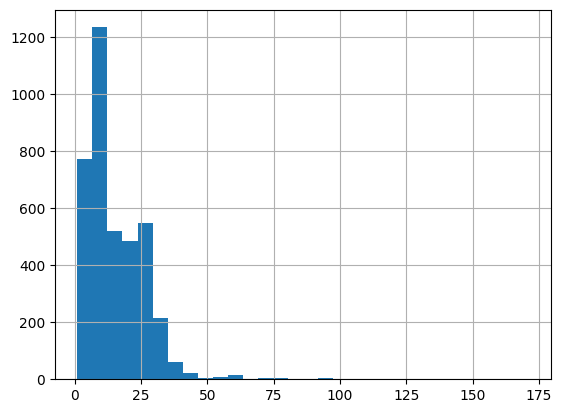

In [18]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

<h1 style="font-size:200%; font-family:cursive; color:navy;">4. Tokenize & Encode the Sequences</h1>

<u><h2 style="font-size:170%; font-family:cursive;">Which Tokenization strategy is used by BERT?</h2></u>

<p style="font-size:150%; font-family:verdana;">BERT uses WordPiece tokenization. The vocabulary is initialized with all the individual characters in the language, and then the most frequent/likely combinations of the existing words in the vocabulary are iteratively added.</p>
<br>
<u><h2 style="font-size:170%; font-family:cursive;">What is the maximum sequence length of the input?</h2></u>

<p style="font-size:150%; font-family:verdana;">The maximum sequence length of the input = 512</p>

In [19]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

/home/volt/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


<h1 style="font-size:200%; font-family:cursive; color:navy;">5. List to Tensors</h1>

In [20]:
## convert lists to tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

<h1 style="font-size:200%; font-family:cursive; color:navy;">6. Data Loader</h1>

In [21]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

<h1 style="font-size:200%; font-family:cursive; color:navy;">7. Model Architecture</h1>

In [22]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [23]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        
        self.bert = bert 
        
        # dropout layer
        self.dropout = nn.Dropout(0.1)
      
        # relu activation function
        self.relu =  nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768,512)
      
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,2)

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):
        
        #pass the inputs to the model  
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
      
        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)
      
        # apply softmax activation
        x = self.softmax(x)

        return x

In [24]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [25]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5) 

/home/volt/.local/lib/python3.10/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [27]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)

print("Class Weights:",class_weights)

Class Weights: [0.57743559 3.72848948]


In [28]:

# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

<h1 style="font-size:200%; font-family:cursive; color:navy;">8. Fine - Tune</h1>

In [29]:
# function to train the model
def train():
    
    model.train()
    total_loss, total_accuracy = 0, 0
  
    # empty list to save model predictions
    total_preds=[]
  
    # iterate over batches
    for step,batch in enumerate(train_dataloader):
        
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
        
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
 
        sent_id, mask, labels = batch
        
        # clear previously calculated gradients 
        model.zero_grad()        

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
  
      # predictions are in the form of (no. of batches, size of batch, no. of classes).
      # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds

In [30]:
# function for evaluating the model
def evaluate():
    
    print("\nEvaluating...")
  
    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0
    
    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):
        
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():
            
            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader) 

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [31]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10


KeyboardInterrupt: 

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

<h1 style="font-size:200%; font-family:cursive; color:navy;">9. Make Predictions</h1>

In [ ]:
# get predictions for test data
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()

In [ ]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       724
           1       0.51      0.81      0.63       112

    accuracy                           0.87       836
   macro avg       0.74      0.85      0.77       836
weighted avg       0.91      0.87      0.88       836



<center><h1 style="font-size:300%; font-family:cursive; color:black; background:skyblue; padding:15px; border:solid;">REFERENCES & CREDITS</h1></center>

<ol>
    <li style="font-size:150%;"><a href="https://www.reddit.com/r/MachineLearning/comments/ao23cp/p_how_to_use_bert_in_kaggle_competitions_a/">How to use BERT in Kaggle competitions - Reddit Thread</a></li>
    <li style="font-size:150%;"><a href="http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/">A visual guide to using BERT by Jay Alammar</a></li>
    <li style="font-size:150%;"><a href="https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/">Demystifying BERT: Groundbreaking NLP Framework by Mohd Sanad Zaki Rizvi</a></li>
    <li style="font-size:150%;"><a href="https://towardsdatascience.com/bert-for-dummies-step-by-step-tutorial-fb90890ffe03">BERT for Dummies step by step tutorial by Michel Kana</a></li>
</ol>

<br>
<center><h1 style="font-size:300%; font-family:cursive; color:black; background:skyblue; padding:15px; border:solid;">CONCLUSION</h1></center>

<p style="font-size:150%; font-family:verdana;">BERT is undoubtedly a breakthrough in the use of Machine Learning for Natural Language Processing. The fact that it’s approachable and allows fast fine-tuning will likely allow a wide range of practical applications in the future. In this Notebook we have discussed about BERT (Theoritical + Practical Part).</p>

<center><h1 style="font-size:200%; color:green;">Please give this kernel an UPVOTE to show your appreciation, if you find it useful.</h1></center>